<a href="https://colab.research.google.com/github/rohitbisen-12/IIIT_PRO_MINOR_LAB/blob/main/Module_05_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2

Classification II : Introduction to Decision Trees

In [ ]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

Loading IRIS Dataset:

About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


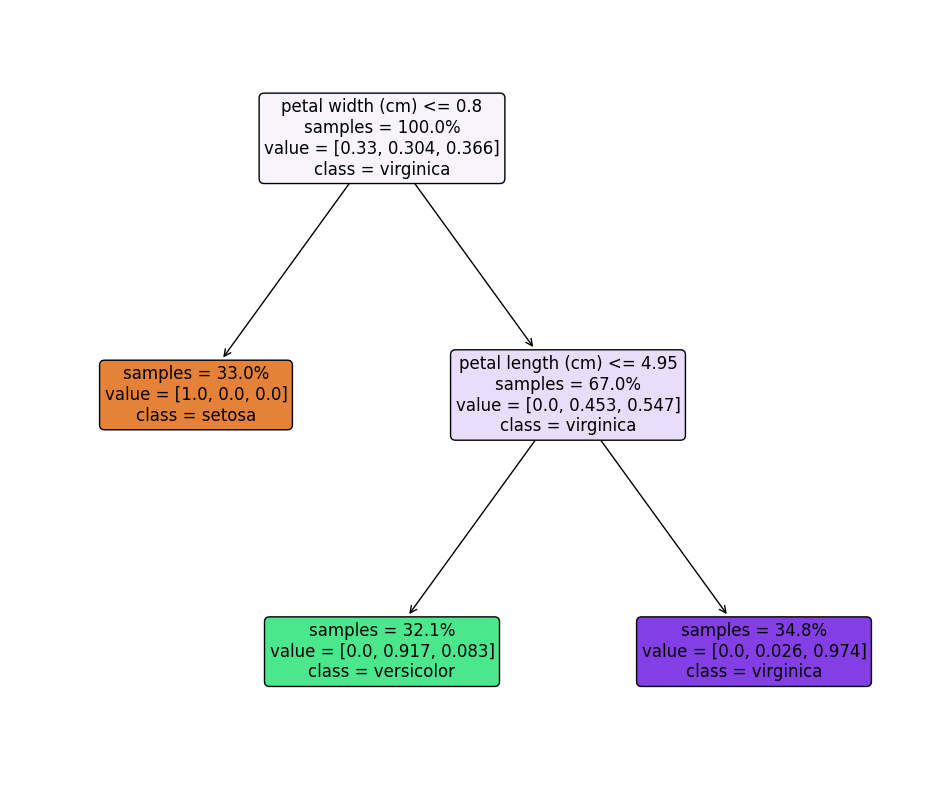

In [ ]:
giveAnExample(2)

Exercise 1:

Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [ ]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


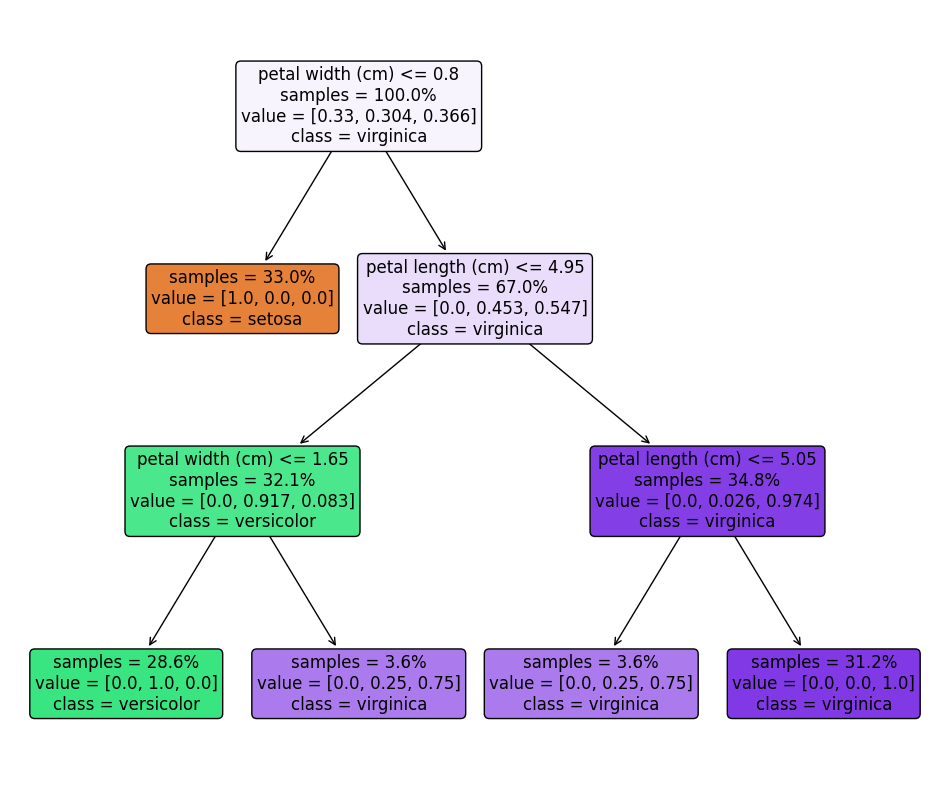

In [ ]:
giveAnExample(3)

Exercise 2:

Repeat Exercise 1 for the above tree as well.

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely petal length and petal width are used

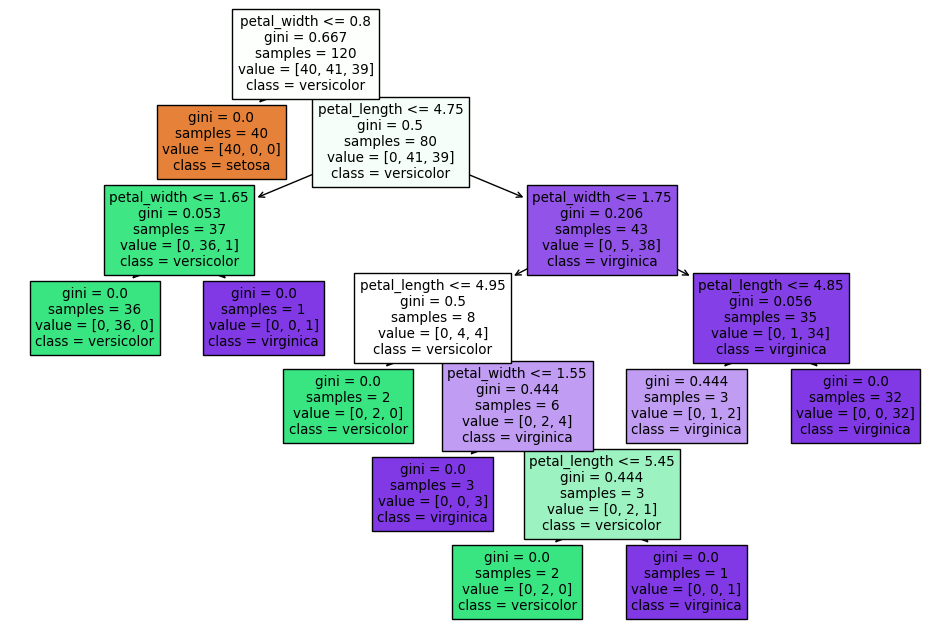

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Use only petal length and petal width
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a trained decision tree model
# Replace 'your_decision_tree' with the actual name of your trained model
your_decision_tree = DecisionTreeClassifier()

# Fit the decision tree model on the training set
your_decision_tree.fit(X_train, y_train)

# Plot decision boundaries
plt.figure(figsize=(12, 8))
plot_tree(your_decision_tree, filled=True, feature_names=['petal_length', 'petal_width'], class_names=iris.target_names)
plt.show()


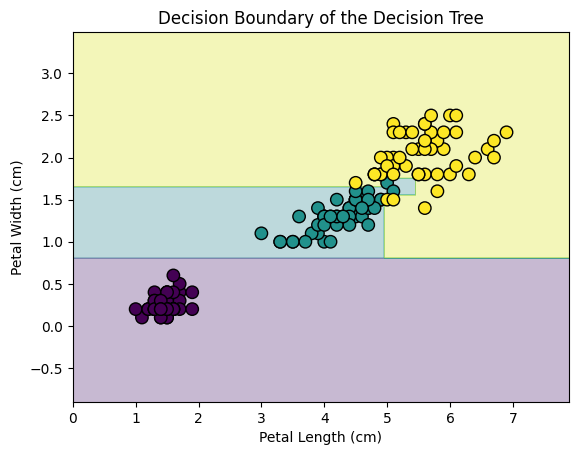

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Assuming you have a trained decision tree model
# Replace 'your_decision_tree' with the actual name of your trained model
your_decision_tree = DecisionTreeClassifier()

# Assuming 'X' contains the features and 'y' contains the labels
iris = load_iris()
X = iris.data[:, [2, 3]]  # Use only petal length and petal width
y = iris.target

# Fit the decision tree model
your_decision_tree.fit(X, y)

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = your_decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80)
plt.title('Decision Boundary of the Decision Tree')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()


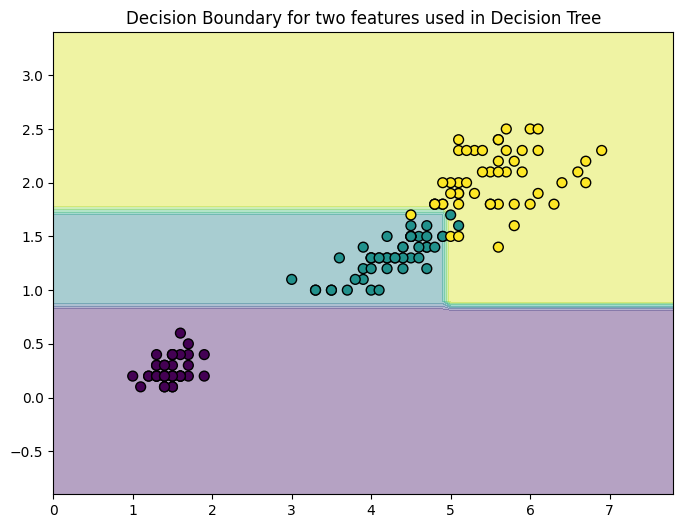

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Exercise 3:

3.1 :

We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of max_depth) and then pause and ponder.

Test with max_depth of the following values:

2

5

10

What do you observe?

3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case?
(Hint: How is a decision made at any node?)

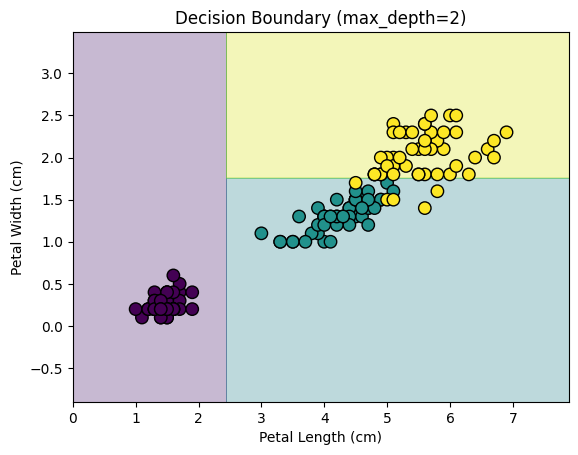

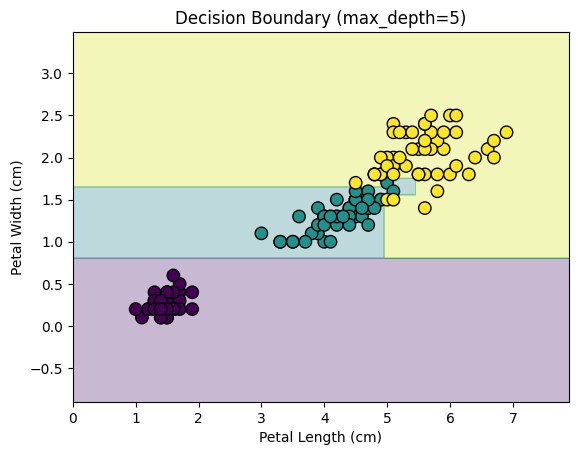

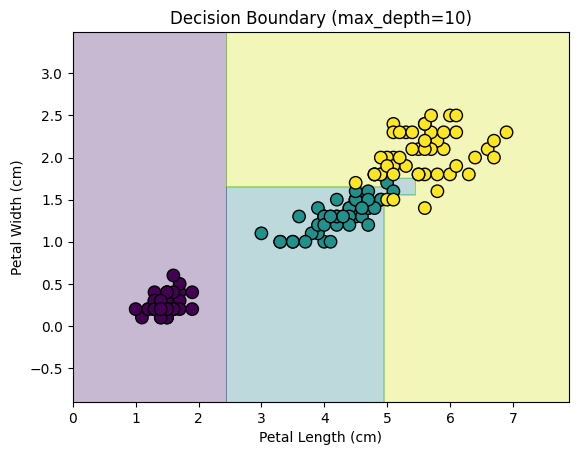

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

def plot_decision_boundary(max_depth, title):
    your_decision_tree = DecisionTreeClassifier(max_depth=max_depth)

    iris = load_iris()
    X = iris.data[:, [2, 3]]  # Use only petal length and petal width
    y = iris.target

    your_decision_tree.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = your_decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80)
    plt.title(title)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.show()

# Test with different max_depth values
plot_decision_boundary(max_depth=2, title='Decision Boundary (max_depth=2)')
plot_decision_boundary(max_depth=5, title='Decision Boundary (max_depth=5)')
plot_decision_boundary(max_depth=10, title='Decision Boundary (max_depth=10)')


3.2)

Decision trees make decisions at each node based on a threshold value for a specific feature. The decision boundaries are formed by dividing the feature space into regions based on these threshold values. When you observe right angles in the decision boundaries, it's because the thresholds are axis-aligned with the feature axes.

Each decision node in a tree corresponds to a feature and a threshold. The decision at each node involves a comparison of the feature value to the threshold. The splitting criterion is typically based on whether the feature value is greater than or equal to the threshold. As a result, the decision boundaries are aligned with the axes.

In other words, decision trees, by nature, make splits that are perpendicular to the feature axes, leading to right-angled decision boundaries. This behavior ensures simplicity and interpretability of the decision boundaries. If the decision boundaries were not aligned with the axes, the model might become overly complex, making it harder to interpret and potentially overfitting the training data.








Exercise 4:

Complete the following function predict: which takes in four variables : sepal width, sepal length, petal width, petal length and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested if else statements.

In [ ]:
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:
    """
    Predict the species of the flower based on the decision tree logic.
    Assumes that the decision tree uses petal length and petal width as features.

    Parameters:
    - sepal_width: Sepal width of the flower
    - sepal_length: Sepal length of the flower
    - petal_width: Petal width of the flower
    - petal_length: Petal length of the flower

    Returns:
    - Species of the flower (string)
    """

    # Decision tree logic based on petal length and petal width
    if petal_length <= X_threshold_value:  # Replace X_threshold_value with the actual threshold value
        if petal_width <= Y_threshold_value:  # Replace Y_threshold_value with the actual threshold value
            return "Setosa"
        else:
            return "Versicolor"
    else:
        return "Virginica"

# Replace X_threshold_value and Y_threshold_value with the actual values from your decision tree model
X_threshold_value = 2.45
Y_threshold_value = 1.75

# Example usage:
predicted_species = predictSpecies(sepal_width=3.0, sepal_length=5.0, petal_width=1.5, petal_length=4.0)
print(f"Predicted Species: {predicted_species}")


Predicted Species: Virginica


Entropy and Information:

In [ ]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


Exercise 5:

Calculate the Entropy of the above collection of 10 datapoints.

Exercise 6:

Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.



In [ ]:
# Question 5
import numpy as np

# Class distribution
class_counts = [3, 4, 3]

# Total number of datapoints
total_datapoints = sum(class_counts)

# Calculate probability of each class
class_probabilities = [count / total_datapoints for count in class_counts]

# Calculate entropy
entropy = -np.sum([p * np.log2(p) if p != 0 else 0 for p in class_probabilities])

print(f"Entropy: {entropy:.4f}")


Entropy: 1.5710


In [ ]:
# question 6
# Given data
petal_lengths = [3.9, 5.6, 5.1, 1.3, 6.1, 3.3, 1.4, 4.8, 1.6, 4.5]
labels = [1, 2, 2, 0, 2, 1, 0, 1, 0, 1]

def calculate_entropy(labels):
    class_counts = [labels.count(i) for i in set(labels)]
    total_datapoints = len(labels)
    class_probabilities = [count / total_datapoints for count in class_counts]
    entropy = -np.sum([p * np.log2(p) if p != 0 else 0 for p in class_probabilities])
    return entropy

# Entropy before the split
entropy_before_split = calculate_entropy(labels)

# Split based on petal length <= 2.5
labels_left = [labels[i] for i in range(len(labels)) if petal_lengths[i] <= 2.5]
labels_right = [labels[i] for i in range(len(labels)) if petal_lengths[i] > 2.5]

# Entropy after the split
entropy_after_split = (len(labels_left) / total_datapoints) * calculate_entropy(labels_left) + \
                     (len(labels_right) / total_datapoints) * calculate_entropy(labels_right)

# Information Gain
information_gain = entropy_before_split - entropy_after_split

print(f"Information Gain: {information_gain:.4f}")


Information Gain: 0.8813
